# <center><b>Python for Data Science</b></center>
# <center><b>Lessons 19 & 20</b></center>
# <center><b>Pandas</b></center>
# <center><b>Presentation 9: How to Work with Dates and Times in Pandas</b></center>

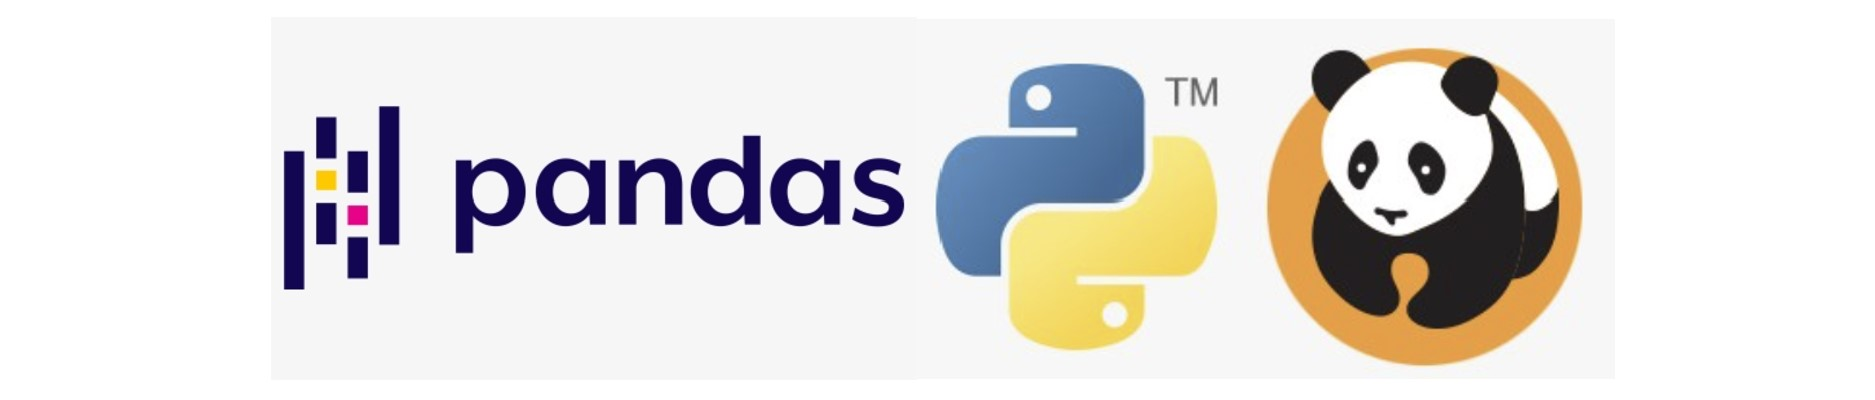

<font size="6"><center>[Link: Pandas Documentation](https://pandas.pydata.org/docs/)</center></font>

##  <span style="color:red">TABLE OF CONTENTS</span>

1. [Working with Time Series](#1)<br>
2. [Dates and Times in Python](#2)<br>
a. [Native Python dates and times:  datetime and dateutil](#2a)<br>
b. [Native Python dates and times:  datetime and dateutil](#2b)<br>
c. [Dates and times in pandas: best of both worlds](#2c)<br>
d. [Pandas Time Series: Indexing by Time](#2d)<br>
3. [Pandas Time Series Data Structures](#3)<br>
a. [Regular sequences: pd.date_range()](#3a)<br>
4. [Frequencies and Offsets](#4)<br>

In [7]:
# set up notebook to display multiple output in one cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print('The notebook is set up to display multiple output in one cell.')

The notebook is set up to display multiple output in one cell.


In [8]:
import pandas as pd
import numpy as np

<div class="alert alert-block alert-info"<br>
     
# <center>HOW TO WORK WITH DATES AND TIMES IN PANDAS</center>
</div>

# <center>The material for this lesson was taken from the resource below:</center>

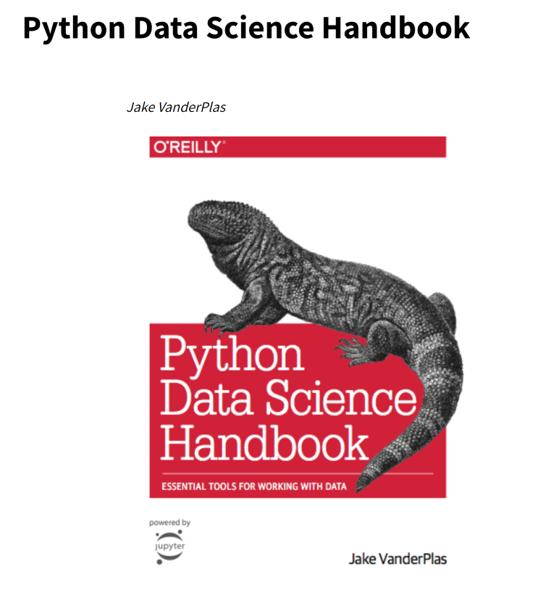

**Link:**&emsp;[**Python for Data Science Handbook**](https://drive.google.com/file/d/1mkv2xfL9jWi9PYp4O04D-0KUYO4zkZne/view)

<div class="alert alert-block alert-warning">
    <b><font size="4">Files needed for this presentation:</font></b>
</div>

#### No files are needed for this presentation.

In [ ]:
# set up notebook to display multiple output in one cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print('The notebook is set up to display multiple output in one cell.')

In [ ]:
# conventional way to import pandas and numpy

import pandas as pd
import numpy as np

<a class="anchor" id="1"></a>
# <span style="color:blue"><b>1. Working with Time Series</b></span>

Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data. Date and time data comes in a few flavors, which we will discuss here:

- <b>Time stamps</b> reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
- <b>Time intervals</b> and <b>periods</b> reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
- <b>Time deltas</b> or <b>durations</b> reference an exact length of time (e.g., a duration of 22.56 seconds).

In this section, we will introduce how to work with each of these types of date/time data in Pandas. This short section is by no means a complete guide to the time series tools available in Python or Pandas, but instead is intended as a broad overview of how you as a user should approach working with time series. We will start with a brief discussion of tools for dealing with dates and times in Python, before moving more specifically to a discussion of the tools provided by Pandas. After listing some resources that go into more depth, we will review some short examples of working with time series data in Pandas.

<a class="anchor" id="2"></a>
# <span style="color:blue"><b>2. Dates and Times in Python</b></span>

The Python world has a number of available representations of dates, times, deltas, and timespans. While the time series tools provided by Pandas tend to be the most useful for data science applications, it is helpful to see their relationship to other packages used in Python.

<a class="anchor" id="2a"></a>
## <span style="color:red"><b><i>a. Native Python dates and times:  datetime and dateutil</b></span>

Python's basic objects for working with dates and times reside in the built-in  <code style="background:#F0F0F0"><b>datetime</b></code> module. Along with the third-party  <code style="background:#F0F0F0"><b>dateutil</b></code> module, you can use it to quickly perform a host of useful functionalities on dates and times. For example, you can manually build a date using the  <code style="background:#F0F0F0"><b>datetime</b></code> type:

In [2]:
from datetime import datetime
datetime(year=2021, month=12, day=13, hour=7, minute=55)

datetime.datetime(2022, 12, 13, 7, 55)

Or, using the <code style="background:#F0F0F0"><b>dateutil</b></code> module, you can parse dates from a variety of string formats:

In [7]:
from dateutil import parser
date = parser.parse("1st of January, 2022")
date

datetime.datetime(2022, 1, 1, 0, 0)

Once you have a  <code style="background:#F0F0F0"><b>datetime</b></code> object, you can do things like printing the day of the week:

In [8]:
date.strftime('%A')

'Saturday'

In the final line, we've used one of the standard string format codes for printing dates <code style="background:#F0F0F0"><b>("%A")</b></code>, which you can read about in the [strftime section](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) of Python's [datetime documentation](https://docs.python.org/3/library/datetime.html). Documentation of other useful date utilities can be found in [dateutil's online documentation](http://labix.org/python-dateutil). A related package to be aware of is <code style="background:#F0F0F0"><b>pytz</b></code>, which contains tools for working with the most migrane-inducing piece of time series data: time zones.

The power of <code style="background:#F0F0F0"><b>datetime</code> and <code style="background:#F0F0F0"><b>dateutil</code> lie in their flexibility and easy syntax: you can use these objects and their built-in methods to easily perform nearly any operation you might be interested in. Where they break down is when you wish to work with large arrays of dates and times: just as lists of Python numerical variables are suboptimal compared to NumPy-style typed numerical arrays, lists of Python datetime objects are suboptimal compared to typed arrays of encoded dates.

<a class="anchor" id="2b"></a>
## <span style="color:red"><b><i>b. Typed arrays of times: NumPy's datetime64</b></span>

The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy. The <code style="background:#F0F0F0"><b>datetime64</b></code> dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly. The <code style="background:#F0F0F0"><b>datetime64</b></code> requires a very specific input format:

In [9]:
import numpy as np
date = np.array('2021-12-25', dtype=np.datetime64)
date

array('2021-12-25', dtype='datetime64[D]')

Once we have this date formatted, however, we can quickly do vectorized operations on it:

In [11]:
date + np.arange(15)

array(['2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
       '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-01',
       '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05',
       '2022-01-06', '2022-01-07', '2022-01-08'], dtype='datetime64[D]')

Because of the uniform type in NumPy <code style="background:#F0F0F0"><b>datetime64</b></code> arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's <code style="background:#F0F0F0"><b>datetime</b></code> objects, especially as arrays get large (we introduced this type of vectorization in [Computation on NumPy Arrays: Universal Functions](https://numpy.org/doc/stable/reference/ufuncs.html).

One detail of the <code style="background:#F0F0F0"><b>datetime64</b></code> and <code style="background:#F0F0F0"><b>timedelta64</b></code> objects is that they are built on a <i>fundamental time unit</i>. Because the <code style="background:#F0F0F0"><b>datetime64</b></code> object is limited to 64-bit precision, the range of encodable times is $2^{64}$ times this fundamental unit. In other words, <code style="background:#F0F0F0"><b>datetime64</b></code> imposes a trade-off between time resolution and maximum time span.

For example, if you want a time resolution of one nanosecond, you only have enough information to encode a range of $2^{64}$ nanoseconds, or just under 600 years. NumPy will infer the desired unit from the input; for example, here is a day-based datetime:

In [13]:
np.datetime64('2021-12-25')

numpy.datetime64('2021-12-25')

Here is a minute-based datetime:

In [17]:
np.datetime64('2021-12-25 20:45')

numpy.datetime64('2021-12-25T20:45')

Notice that the time zone is automatically set to the local time on the computer executing the code. You can force any desired fundamental unit using one of many format codes; for example, here we'll force a nanosecond-based time:

In [18]:
np.datetime64('2021-12-25 12:59:59.50', 'ns')

numpy.datetime64('2021-12-25T12:59:59.500000000')

The following table, drawn from the [NumPy datetime64 documentation](https://numpy.org/doc/stable/reference/arrays.datetime.html), lists the available format codes along with the relative and absolute timespans that they can encode:

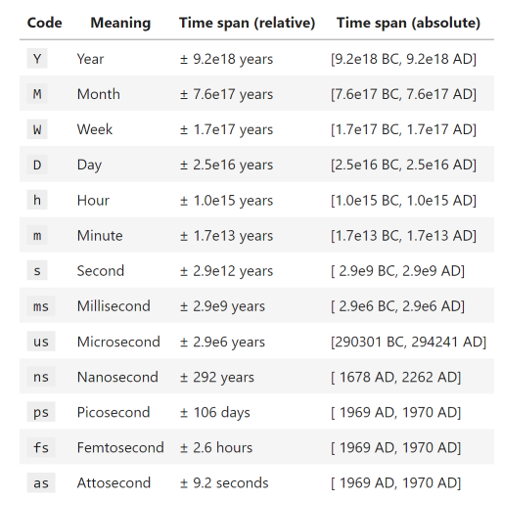

For the types of data we see in the real world, a useful default is <code style="background:#F0F0F0"><b>datetime64[ns]</b></code>, as it can encode a useful range of modern dates with a suitably fine precision.

Finally, we will note that while the <code style="background:#F0F0F0"><b>datetime64</b></code> data type addresses some of the deficiencies of the built-in Python <code style="background:#F0F0F0"><b>datetime</b></code> type, it lacks many of the convenient methods and functions provided by <code style="background:#F0F0F0"><b>datetime</b></code> and especially <code style="background:#F0F0F0"><b>dateutil</b></code>. More information can be found in [NumPy's datetime64 documentation](https://numpy.org/doc/stable/reference/arrays.datetime.html).

<a class="anchor" id="2c"></a>
## <span style="color:red"><b><i>c. Dates and times in pandas: best of both worlds</b></span>

Pandas builds upon all the tools just discussed to provide a <code style="background:#F0F0F0"><b>Timestamp</b></code> object, which combines the ease-of-use of <code style="background:#F0F0F0"><b>datetime</b></code> and <code style="background:#F0F0F0"><b>dateutil</b></code> with the efficient storage and vectorized interface of <code style="background:#F0F0F0"><b>numpy.datetime64</b></code>. From a group of these <code style="background:#F0F0F0"><b>Timestamp</b></code> objects, Pandas can construct a <code style="background:#F0F0F0"><b>DatetimeIndex</b></code> that can be used to index data in a <code style="background:#F0F0F0"><b>Series</b></code> or <code style="background:#F0F0F0"><b>DataFrame</b></code>; we'll see many examples of this below.

For example, we can use Pandas tools to repeat the demonstration from above. We can parse a flexibly formatted string date, and use format codes to output the day of the week:

In [78]:
import pandas as pd
date = pd.to_datetime("25th of December, 2021")
date

Timestamp('2021-12-25 00:00:00')

In [85]:
date.strftime('%A')

'Saturday'

Additionally, we can do NumPy-style vectorized operations directly on this same object:

In [28]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-01',
               '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05'],
              dtype='datetime64[ns]', freq=None)

In the next section, we will take a closer look at manipulating time series data with the tools provided by Pandas.

<a class="anchor" id="2d"></a>
## <span style="color:red"><b><i>d. Pandas Time Series: Indexing by Time</b></span>

Where the Pandas time series tools really become useful is when you begin to <i>index data by timestamps</i>. For example, we can construct a <code style="background:#F0F0F0"><b>Series</b></code> object that has time indexed data:

In [33]:
index = pd.DatetimeIndex(['2021-12-25', '2021-12-31',
                          '2022-12-25', '2022-12-31'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2021-12-25    0
2021-12-31    1
2022-12-25    2
2022-12-31    3
dtype: int64

In [9]:
index = pd.DatetimeIndex(['2021-12-25', '2021-12-31',
                          '2022-12-25', '2022-12-31'])
str_data = pd.Series(['Christmas This Year', 'New Year\'s Eve This Year', 'Christmas Next Year', 
                      'New Year\'s Eve Next Year'], 
                     index=index)
str_data

2021-12-25         Christmas This Year
2021-12-31    New Year's Eve This Year
2022-12-25         Christmas Next Year
2022-12-31    New Year's Eve Next Year
dtype: object

Now that we have this data in a Series, we can make use of any of the Series indexing patterns we discussed in previous sections, passing values that can be coerced into dates:

In [31]:
data['2021-12-25':'2022-12-25']

2021-12-25    0
2021-12-31    1
2022-12-25    2
dtype: int64

In [32]:
str_data['2021-12-25':'2022-12-25']

2021-12-25         Christmas This Year
2021-12-31    New Year's Eve This Year
2022-12-25         Christmas Next Year
dtype: object

There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

In [34]:
data['2021']

2021-12-25    0
2021-12-31    1
dtype: int64

In [36]:
str_data['2022']

2022-12-25         Christmas Next Year
2022-12-31    New Year's Eve Next Year
dtype: object

Later, we will see additional examples of the convenience of dates-as-indices. But first, a closer look at the available time series data structures.

<a class="anchor" id="3"></a>
# <span style="color:blue"><b>3. Pandas Time Series Data Structures </b></span>

This section will introduce the fundamental Pandas data structures for working with time series data:<br>
<p>&nbsp;</p>
For <span style='color:Blue'><i><b>time stamps</b></i></span>, Pandas provides the <code style="background:#F0F0F0"><b>Timestamp</b></code> type.

- As mentioned before, it is essentially a replacement for Python's native <code style="background:#F0F0F0"><b>datetime</b></code>, but is based on the more efficient <code style="background:#F0F0F0"><b>numpy.datetime64</b></code> data type. 
- The associated Index structure is <code style="background:#F0F0F0"><b>DatetimeIndex</b></code><br>.
<p>&nbsp;</p>

For <span style='color:Blue'><i><b>time Periods</b></i></span>, Pandas provides the <code style="background:#F0F0F0"><b>Period</b></code> type. 
- This encodes a fixed-frequency interval based on <code style="background:#F0F0F0"><b>numpy.datetime64</b></code>. 
- The associated index structure is <code style="background:#F0F0F0"><b>PeriodIndex</b></code>.<br>
<p>&nbsp;</p>

For <span style='color:Blue'><i><b>time deltas</b></i></span> or <i>durations</i>, Pandas provides the <code style="background:#F0F0F0"><b>Timedelta</b></code> type.
- <code style="background:#F0F0F0"><b>Timedelta</b></code> is a more efficient replacement for Python's native <code style="background:#F0F0F0"><b>datetime.timedelta</b></code> type, and is based on <code style="background:#F0F0F0"><b>numpy.timedelta64</b></code>. 
- The associated index structure is <code style="background:#F0F0F0"><b>TimedeltaIndex</b></code>.<br>
<p>&nbsp;</p>

1. The most fundamental of these date/time objects are the <code style="background:#F0F0F0"><b>Timestamp</b></code> and <code style="background:#F0F0F0"><b>DatetimeIndex</b></code> objects. 
2. While these class objects can be invoked directly, it is more common to use the <code style="background:#F0F0F0"><b>pd.to_datetime()</b></code> function, which can parse a wide variety of formats. 
3. Passing a single date to <code style="background:#F0F0F0"><b>pd.to_datetime()</b></code> yields a <code style="background:#F0F0F0"><b>Timestamp</b></code>; passing a series of dates by default yields a <code style="background:#F0F0F0"><b>DatetimeIndex</b></code>:

In [41]:
date = pd.to_datetime('09-23-2017')
date

Timestamp('2017-09-23 00:00:00')

In [86]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any <code style="background:#F0F0F0"><b>DatetimeIndex</b></code> can be converted to a <code style="background:#F0F0F0"><b>PeriodIndex</b></code> with the <code style="background:#F0F0F0"><b>to_period() function</b></code> with the addition of a frequency code; here we'll use <code style="background:#F0F0F0"><b>'D'</b></code> to indicate daily frequency:

In [50]:
date.to_period('D')

Period('2017-09-23', 'D')

In [47]:
date.to_period('W')

Period('2017-09-18/2017-09-24', 'W-SUN')

In [48]:
date.to_period('M')

Period('2017-09', 'M')

In [49]:
date.to_period('Y')

Period('2017', 'A-DEC')

In [44]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [88]:
dates.to_period('W')

PeriodIndex(['2015-06-29/2015-07-05', '2015-06-29/2015-07-05',
             '2015-07-06/2015-07-12', '2015-07-06/2015-07-12',
             '2015-07-06/2015-07-12'],
            dtype='period[W-SUN]', freq='W-SUN')

In [87]:
dates.to_period('M')

PeriodIndex(['2015-07', '2015-07', '2015-07', '2015-07', '2015-07'], dtype='period[M]', freq='M')

In [53]:
dates.to_period('Y')

PeriodIndex(['2015', '2015', '2015', '2015', '2015'], dtype='period[A-DEC]', freq='A-DEC')

A <code style="background:#F0F0F0"><b>TimedeltaIndex</b></code> is created, for example, when a date is subtracted from another:

In [55]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

<a class="anchor" id="3a"></a>
## <span style="color:red"><b><i>a. Regular sequences: pd.date_range()</b></span>

To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: <code style="background:#F0F0F0"><b>pd.date_range()</b></code> for timestamps, <code style="background:#F0F0F0"><b>pd.period_range()</b></code> for periods, and <code style="background:#F0F0F0"><b>pd.timedelta_range()</b></code> for time deltas.<br> 

We've seen that Python's <code style="background:#F0F0F0"><b>range()</b></code> and <code style="background:#F0F0F0"><b>NumPy's np.arange()</b></code> turn a startpoint, endpoint, and optional stepsize into a sequence. Similarly, <code style="background:#F0F0F0"><b>pd.date_range()</b></code> accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates. By default, the frequency is one day:

In [59]:
pd.date_range('2021-12-13', '2021-12-25')

DatetimeIndex(['2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16',
               '2021-12-17', '2021-12-18', '2021-12-19', '2021-12-20',
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25'],
              dtype='datetime64[ns]', freq='D')

Alternatively, the date range can be specified not with a start and endpoint, but with a startpoint and a number of periods:

In [60]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

The spacing can be modified by altering the freq argument, which defaults to D. For example, here we will construct a range of hourly timestamps:

In [64]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

All of these require an understanding of Pandas frequency codes, which we'll summarize in the next section.

<a class="anchor" id="4"></a>
# <span style="color:blue"><b>4. Frequencies and Offsets</b></span>

Fundamental to these Pandas time series tools is the concept of a frequency or date offset. Just as we saw the D (day) and H (hour) codes above, we can use such codes to specify any desired frequency spacing. The following table summarizes the main codes available:

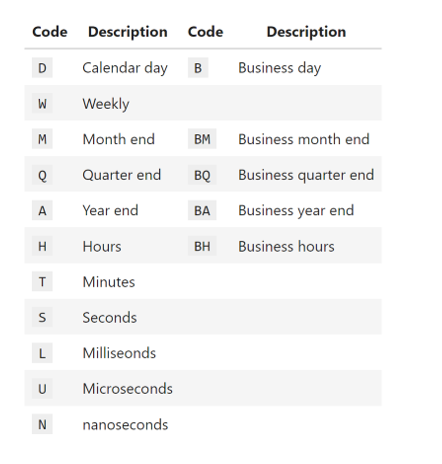

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period. By adding an S suffix to any of these, they instead will be marked at the beginning:

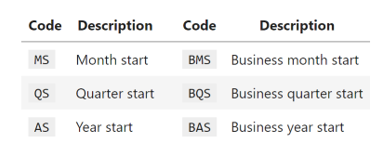

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

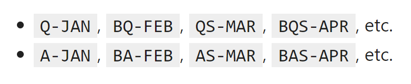

In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:

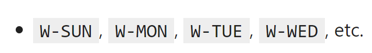

On top of this, codes can be combined with numbers to specify other frequencies. For example, for a frequency of 5 hours 30 minutes, we can combine the hour <code style="background:#F0F0F0"><b>(H)</b></code> and minute <code style="background:#F0F0F0"><b>(T)</b></code> codes as follows:

In [68]:
pd.timedelta_range(0, periods=9, freq="5H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 05:30:00', '0 days 11:00:00',
                '0 days 16:30:00', '0 days 22:00:00', '1 days 03:30:00',
                '1 days 09:00:00', '1 days 14:30:00', '1 days 20:00:00'],
               dtype='timedelta64[ns]', freq='330T')

All of these short codes refer to specific instances of Pandas pd.tseries.offsets, which can be found in the <code style="background:#F0F0F0"><b>time series offsets</b></code> module. For example, we can create a business day offset directly as follows:

In [76]:
from pandas.tseries.offsets import BDay
pd.date_range('2021-07-01', periods=10, freq=BDay())

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-05', '2021-07-06',
               '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-12',
               '2021-07-13', '2021-07-14'],
              dtype='datetime64[ns]', freq='B')

For more discussion of the use of frequencies and offsets, see the ["DateOffset" section](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) of the Pandas documentation.